#Introduction to neural network classification with tensorflow

A classification is something where you identify something from a a list of possible options.<br>
Types:


*   Binary Classification.
*   Multiclass Classification.
*   Multilabel Classification.





Lets create a simple dataset and play with it.Lets use make circle to create the sample dataset for classification

In [77]:
#importing libraries
from sklearn.datasets import make_circles
n_samples=1000
x,y=make_circles(n_samples,noise=0.03,random_state=42)
x[:10],y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

Let's visulaise this data to understand it in a better way

In [78]:
import pandas as pd
#convert data to dataframe
circles=pd.DataFrame({"X0":x[:,0],"X1":x[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


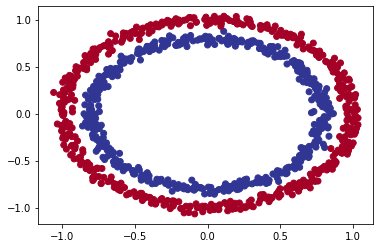

In [79]:
#visualize data as a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

Our aim is to classify a given point is a part of the inner circle or outter circle.More clearly the data belongs to red group or blue group

##Input and output shapes

In [80]:
#check the shapes
x.shape,y.shape

((1000, 2), (1000,))

In [81]:
x[0],y[0]

(array([0.75424625, 0.23148074]), 1)

The typical steps for creating a model.
1.   Create the model
2.   Compile the model.
1.   Fit the model
2.   Evaluate the model
1.   Tweak & evalute again
2.  Tweak & evalute again.............







In [82]:
import tensorflow as tf

In [83]:
#set random seed.
tf.random.set_seed=42
#Create a simple model with one layer
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#Comple the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
#fit the model.
model_1.fit(x,y,epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 5.9906 - accuracy: 0.4760
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 5.4471 - accuracy: 0.4290
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 5.1774 - accuracy: 0.4580
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 5.1305 - accuracy: 0.4580
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 4.9488 - accuracy: 0.4620
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 4.6371 - accuracy: 0.4720
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 4.1535 - accuracy: 0.4820
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9971 - accuracy: 0.4850
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7201 - accuracy: 0.4960
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.4890


 48% Accuracy means the model is not learning anything. its ,just predicting.So lets improve our model

In [84]:
#lets add more layer and see whats happening 
#set ransom seed
tf.random.set_seed=42
#creating the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
#complie the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
#fit the model
model_2.fit(x,y,epochs=100,verbose=0)
#evalute the model 
model_2.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5000


[0.6937170624732971, 0.5]

The results are not improving .so let's experiment bit more


In [96]:
#set random seet
tf.random.set_seed=42
#Creating a model
model_3=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)
#Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
#fit the model
model_3.fit(x,y,epochs=10,verbose=0)
model_3.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7025 - accuracy: 0.5850


[0.7024634480476379, 0.5849999785423279]

model not giving any improvements. To analyse more and figure out whats happening, its visualize predictions and the decision boundary

In [97]:
import numpy as np
def plot_decision_boundary(model,X,y):
  """
   A function to plot the decision boundary created by the model predction on X 
   """
  #Define aixs boundaries for the plot and create a meshgrid
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))

  #Make predictions on on X using the mode
  x_in=np.c_[xx.ravel(),yy.ravel()] #stack 2D array together
  y_pred=model.predict(x_in)
  if len(y_pred[0])>1:
    print("doing multiclass classification")
    #We have reshape to make then ready
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("Binary Classification")
    y_pred=np.round(y_pred).reshape(xx.shape)
  #Plot the descion boundary
  print(xx.shape,yy.shape)
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())
 

313/313 [==============================] - 0s 1ms/step
Binary Classification
(100, 100) (100, 100)


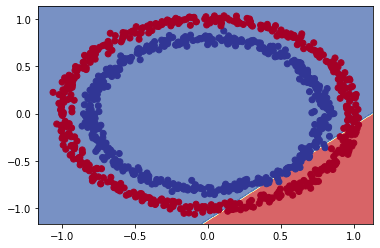

In [98]:
plot_decision_boundary(model_3,x,y)

This means our decison boudary is linear. We are missing the non linearlity

In [114]:
# Lets try creating our model with a non linear action function
#Set random seed
tf.random.set_seed=42
#Create the model
model_4= tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
    
])
#Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"]
                )
# Fit the model
history=model_4.fit(x,y,epochs=100,verbose=0)
#Evaluate the model
model_4.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.2343 - accuracy: 0.5200


[7.234274864196777, 0.5199999809265137]

313/313 [==============================] - 1s 2ms/step
Binary Classification
(100, 100) (100, 100)


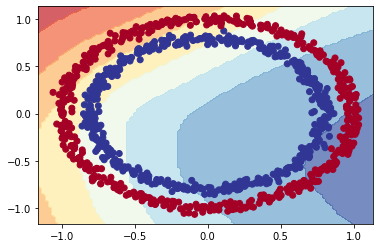

In [115]:
#check thde decion boudary
plot_decision_boundary(model_4,x,y)

Its learning something .So lets try adding more layers.

In [116]:
#set the random seed
tf.random.set_seed=42
#creating the model
model_5=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(1),
    ]
)
#Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])
#Fit the model
history=model_5.fit(x,y,epochs=1000,verbose=0)
#evalute the model
model_5.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 1ms/step
Binary Classification
(100, 100) (100, 100)


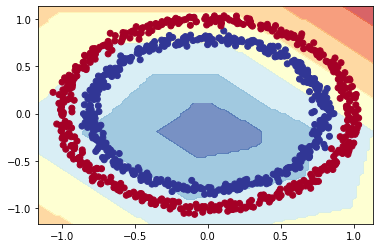

In [117]:
# Visualise the boundary
plot_decision_boundary(model_5,x,y)


its learning something. But not better than gussessing.
Lets add some activation function output layer 

In [121]:
#set the random seed
tf.random.set_seed=42
#Create the model
model_6=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ]
)
#compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])
#fit the  model
history=model_6.fit(x,y,epochs=100,verbose=0)
#evaluate the model
model_6.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9840


[0.040138524025678635, 0.984000027179718]

313/313 [==============================] - 0s 1ms/step
Binary Classification
(100, 100) (100, 100)


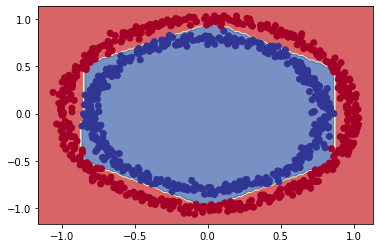

In [122]:
#plot decion boudary
plot_decision_boundary(model_6,x,y)

Finally the model is working as expected.
Lets save the the model. But we have evaluate the model with same training data.